# Problem-4.2:Factor Analysis with Mtcars data using python

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

In [2]:
#load mtcars dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/mtcars.csv"
mtcars = pd.read_csv(url)

In [3]:
# Keep numeric columns
X = mtcars.select_dtypes(include=[np.number])

In [4]:
# Step 1: KMO and Bartlett's Test
kmo_all, kmo_model = calculate_kmo(X)
chi_square_value, p_value = calculate_bartlett_sphericity(X)
print(f"KMO: {kmo_model:.3f}  |  Bartlett's p-value: {p_value:.5f}")

KMO: 0.846  |  Bartlett's p-value: 0.00000


Since the value of KMO is greater than 0.60 and p-value is less than 0.005 we can say that this dataset is suitable for factor analysis.

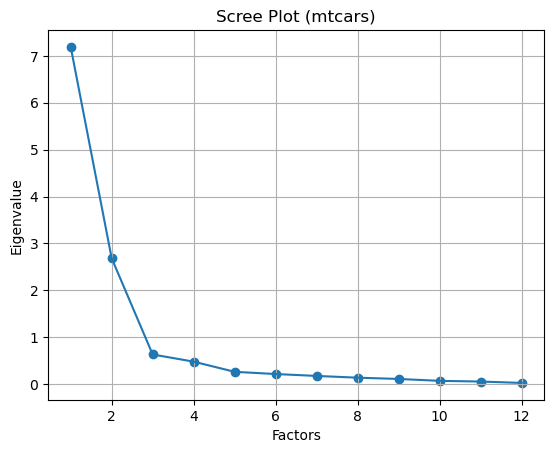

[7.19198319 2.68134433 0.62918966 0.4754904  0.25893866 0.21181999
 0.1711376  0.13379794 0.10656081 0.06638458 0.05135403 0.02199881]


In [5]:
# Step 2: Scree Plot & Eigenvalues
fa = FactorAnalyzer(rotation=None)
fa.fit(X)
ev, v = fa.get_eigenvalues()

plt.scatter(range(1, X.shape[1] + 1), ev)
plt.plot(range(1, X.shape[1] + 1), ev)
plt.title("Scree Plot (mtcars)")
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

print(ev)

In [6]:
# Choose factors with eigenvalue > 1
n_factors = sum(ev > 1)
print(f"Suggested number of factors: {n_factors}")

Suggested number of factors: 2


In [7]:
# Step 3: Final Factor Analysis
fa_final = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
fa_final.fit(X)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [8]:
# Factor Loadings
loadings = pd.DataFrame(fa_final.loadings_, index=X.columns, 
                        columns=[f"Factor{i+1}" for i in range(n_factors)])
print("\nFactor Loadings:\n", loadings)

# Variance Explained
variance = pd.DataFrame({
    "SS Loadings": fa_final.get_factor_variance()[0],
    "Proportion Var": fa_final.get_factor_variance()[1],
    "Cumulative Var": fa_final.get_factor_variance()[2]
}, index=[f"Factor{i+1}" for i in range(n_factors)])
print("\nVariance Explained:\n", variance)


Factor Loadings:
        Factor1   Factor2
mpg  -0.669448  0.658813
cyl   0.747829 -0.604903
disp  0.642022 -0.708485
hp    0.903177 -0.284095
drat -0.240368  0.799751
wt    0.484204 -0.768196
qsec -0.861912 -0.182516
vs   -0.791490  0.265353
am    0.038000  0.900159
gear  0.116417  0.888434
carb  0.799372  0.084884
fast -0.663300  0.371963

Variance Explained:
          SS Loadings  Proportion Var  Cumulative Var
Factor1     4.990871        0.415906        0.415906
Factor2     4.461217        0.371768        0.787674


**Interpretation**

Factor Loadings:
* Factor 1: High positive loadings on hp, carb, cyl, disp and negative on mpg, qsec, vs. This seems to represent Engine Size & Power vs. Efficiency -big, powerful engines have higher horsepower & displacement but lower mpg.

* Factor 2: High positive loadings on am, gear, drat and negative on wt, disp. This seems to represent Performance & Transmission Type lighter, sportier cars with manual transmissions and higher gearing score higher here.

Variance Explained:

* Factor 1 explains 41.6% of total variance.
* Factor 2 explains 37.2% of total variance.

Together, they explain 78.8% of all variability in the dataset — meaning these two factors summarize most of the important patterns in the data.